<a href="https://colab.research.google.com/github/sathishkumar19/Sathish_Portfolio/blob/main/docs/Databases/Projects/cineflix_store/cineflix_store_sql_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CineFlix Data Analysis using SQL

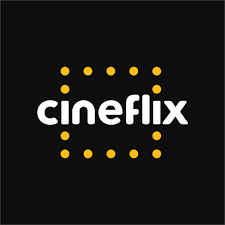


### 1. Importing the Data for SQL Analysis

In [1]:
from google.colab import auth
from google.cloud import bigquery
import os
import zipfile

In [2]:
# ✅ Authenticate with your Google account
auth.authenticate_user()

# ✅ Ask for project ID
project_id = input("Please enter your Google Cloud Project ID:")

Please enter your Google Cloud Project ID:sathish-scaler-projects


In [35]:
# ✅ Upload your ZIP
from google.colab import files
uploaded = files.upload()

Saving cineflix_store.zip to cineflix_store (1).zip


In [43]:
# ✅ Unzip uploaded file
import shutil
zip_file_name = next(iter(uploaded))
base_extract_path = "/content/bq_dataset_files"
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(base_extract_path)

In [44]:
# ✅ Dataset mapping (folder names inside your ZIP)
dataset_mapping = {
    "cineflix_store": "cineflix_store",
}

In [46]:
# ✅ Unzip uploaded file
import shutil
zip_file_name = next(iter(uploaded))
base_extract_path = "/content/bq_dataset_files"

# Extract to base path directly instead of a subdirectory
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(base_extract_path)

# ✅ Dataset mapping (folder names inside your ZIP)
dataset_mapping = {
    "cineflix_store": "", # Assuming the CSV files are directly inside the unzipped folder. Adjust if needed.
 # for summer_olympics.csv in root
}


# ✅ Create datasets and load CSVs
client = bigquery.Client(project=project_id)

for dataset_id, subfolder in dataset_mapping.items():
    dataset_ref = bigquery.Dataset(f"{project_id}.{dataset_id}")
    try:
        client.get_dataset(dataset_ref)
        print(f"✅ Dataset already exists: {dataset_id}")
    except Exception:
        client.create_dataset(dataset_ref)
        print(f"🆕 Created dataset: {dataset_id}")

    # folder path adjustment to reflect changes in extraction
    folder_path = os.path.join(base_extract_path, subfolder) # The CSV files should be present directly inside this folder
    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            table_id = file.replace(".csv", "")
            file_path = os.path.join(folder_path, file)
            table_ref = f"{project_id}.{dataset_id}.{table_id}"

            job_config = bigquery.LoadJobConfig(
                source_format=bigquery.SourceFormat.CSV,
                skip_leading_rows=1,
                autodetect=True
            )

            with open(file_path, "rb") as source_file:
                job = client.load_table_from_file(source_file, table_ref, job_config=job_config)
            job.result()
            print(f"📥 Uploaded: {file} → {table_ref}")

print("✅ All CSV files uploaded to BigQuery.")

✅ Dataset already exists: cineflix_store
📥 Uploaded: film_text.csv → sathish-scaler-projects.cineflix_store.film_text
📥 Uploaded: payment.csv → sathish-scaler-projects.cineflix_store.payment
📥 Uploaded: staff.csv → sathish-scaler-projects.cineflix_store.staff
📥 Uploaded: category.csv → sathish-scaler-projects.cineflix_store.category
📥 Uploaded: city.csv → sathish-scaler-projects.cineflix_store.city
📥 Uploaded: customer.csv → sathish-scaler-projects.cineflix_store.customer
📥 Uploaded: country.csv → sathish-scaler-projects.cineflix_store.country
📥 Uploaded: inventory.csv → sathish-scaler-projects.cineflix_store.inventory
📥 Uploaded: rental.csv → sathish-scaler-projects.cineflix_store.rental
📥 Uploaded: film_actor.csv → sathish-scaler-projects.cineflix_store.film_actor
📥 Uploaded: language.csv → sathish-scaler-projects.cineflix_store.language
📥 Uploaded: actor.csv → sathish-scaler-projects.cineflix_store.actor
📥 Uploaded: address.csv → sathish-scaler-projects.cineflix_store.address
📥 Uplo

### 2. Schema Structure of the DataSet

ER Diagram for the Cineflix Dataset


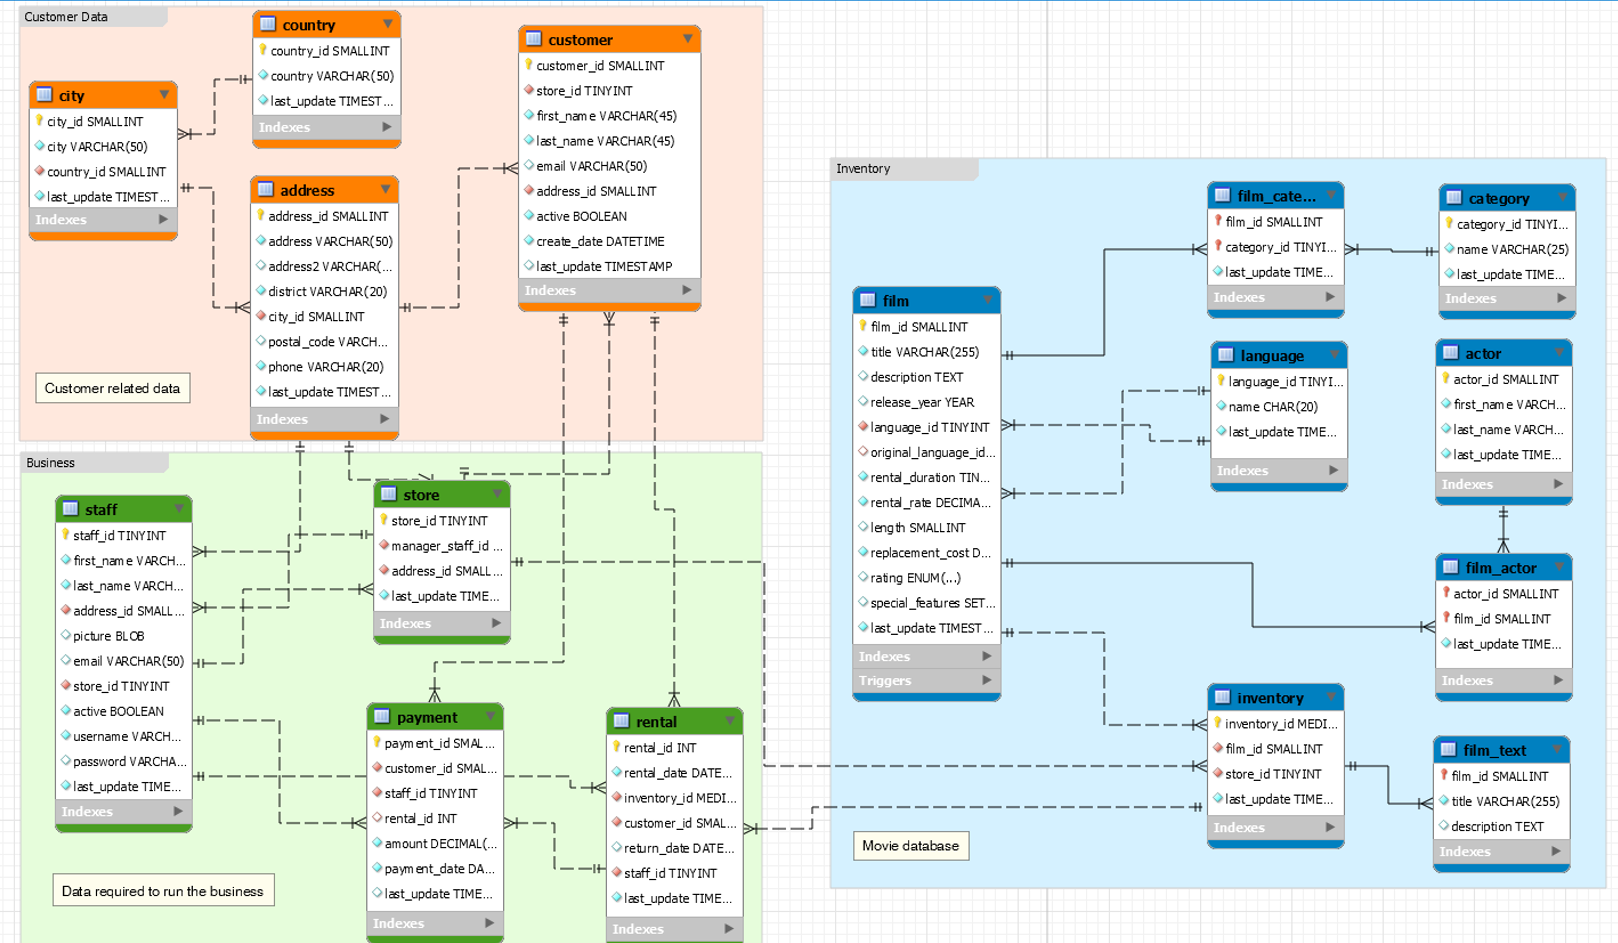

### 3. Validation

**Validating the Table from BigQuery Console**

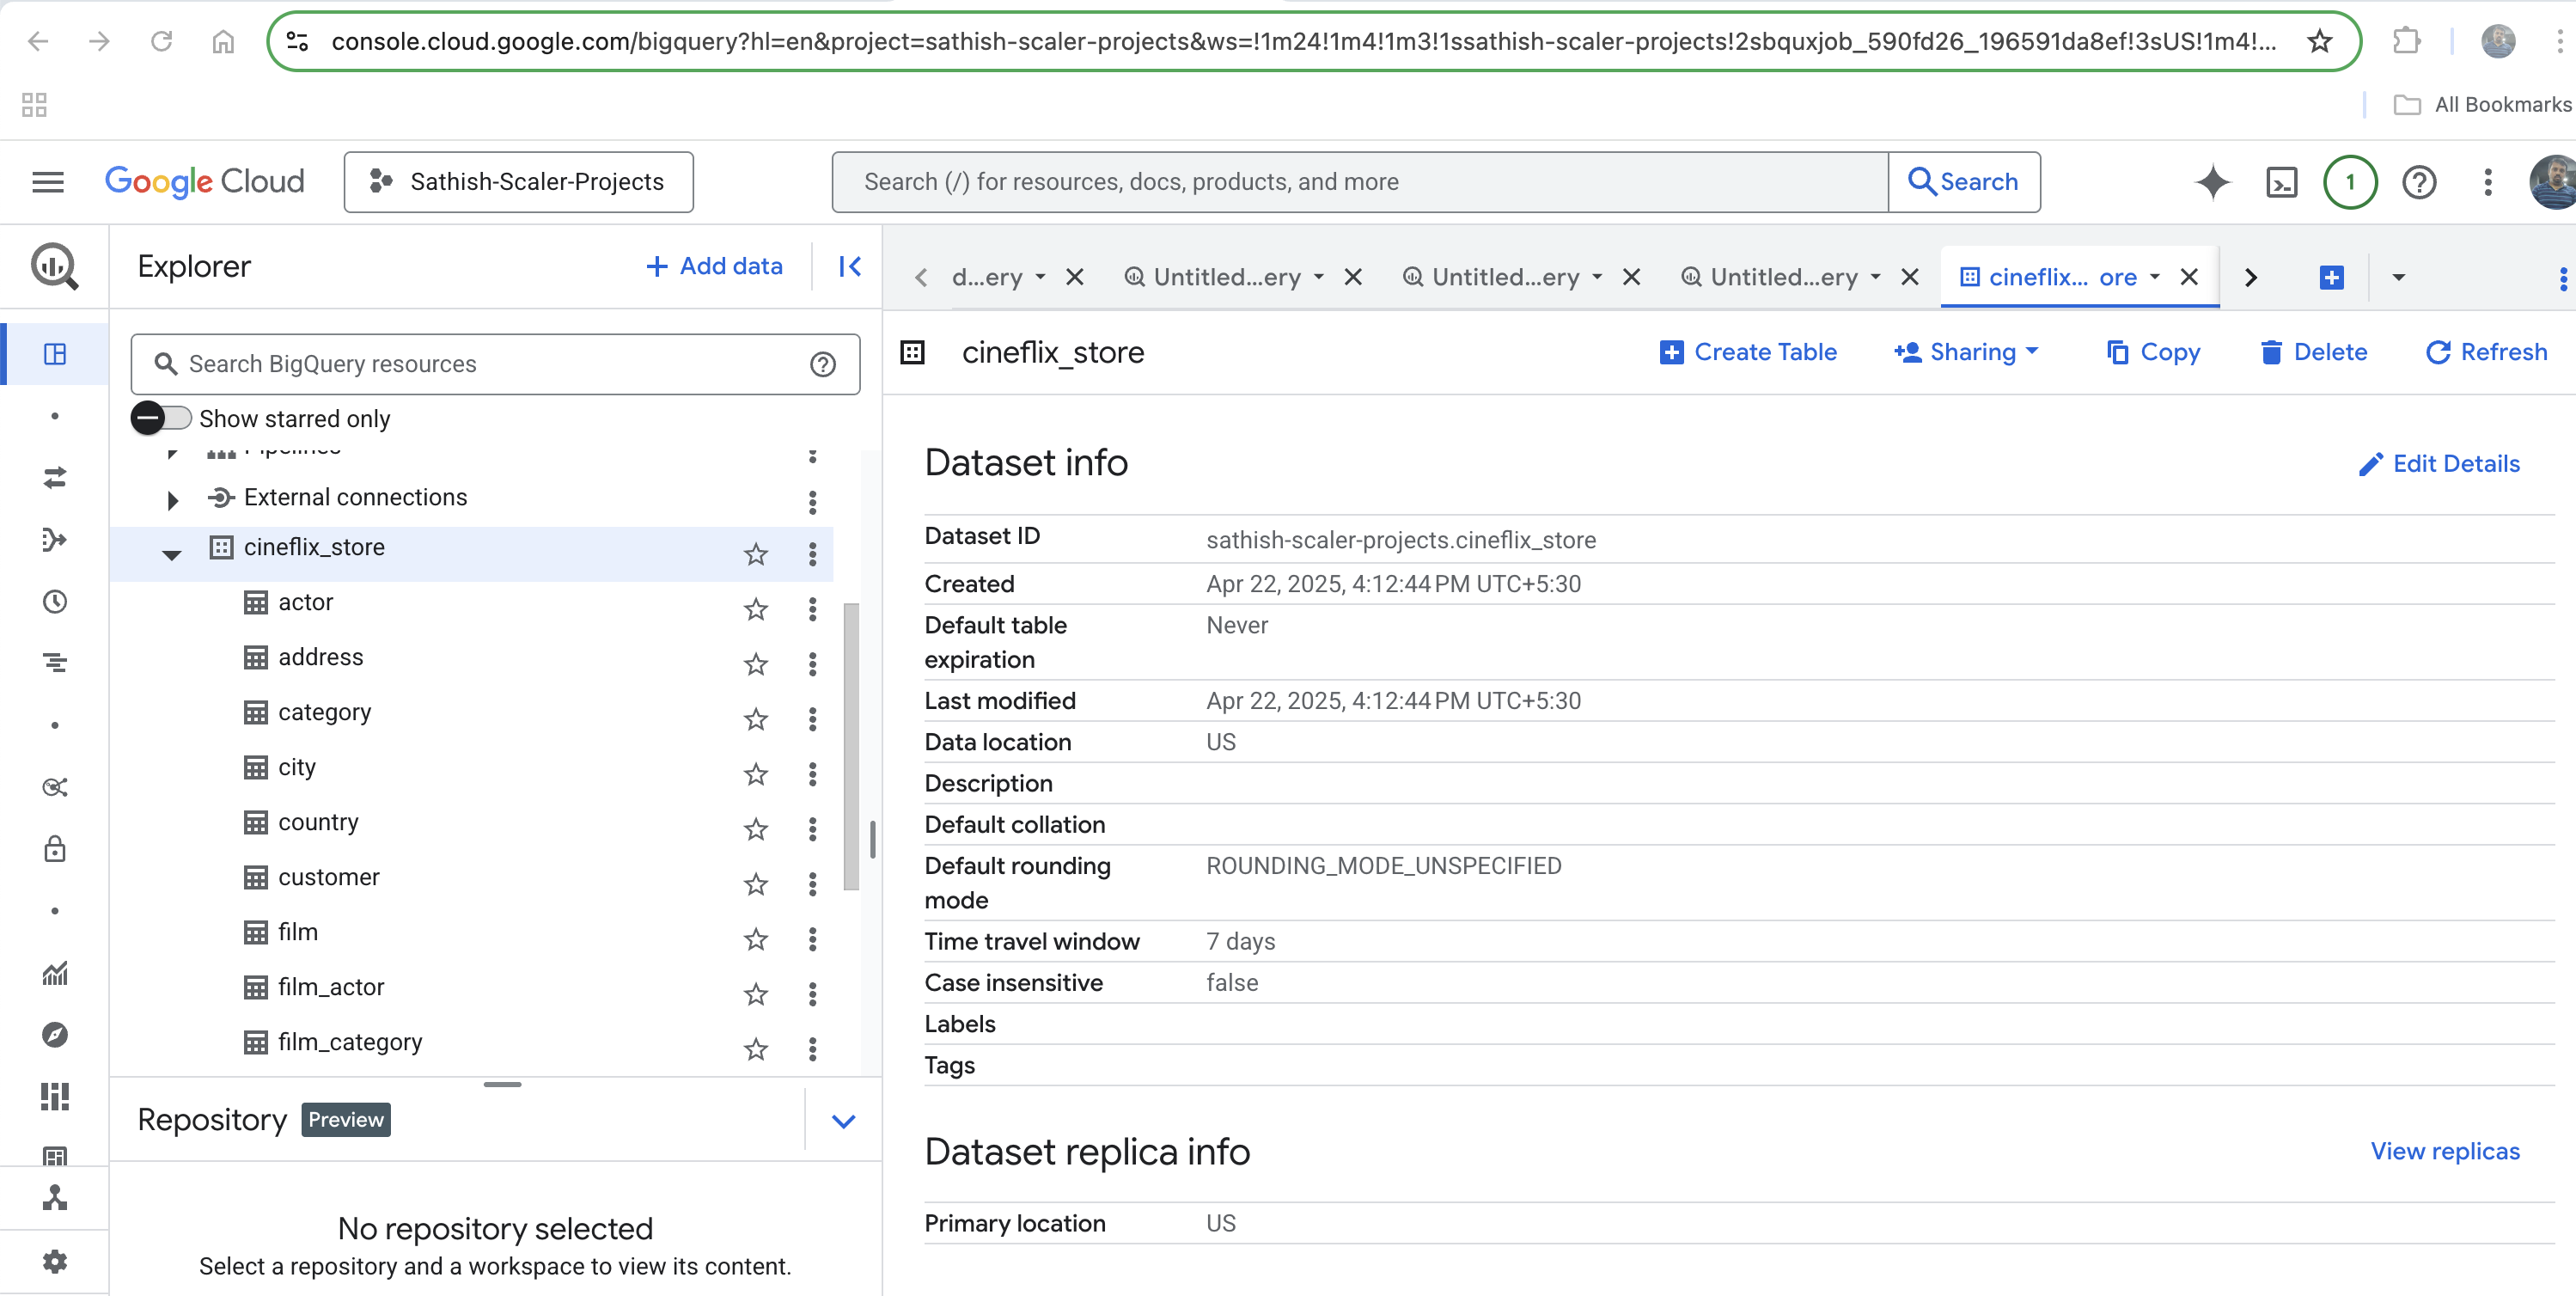

**Imports required for the BigQuery and Table format**

In [3]:
from google.cloud import bigquery
from tabulate import tabulate

**Setup BigQuery Client Connection**

In [4]:
# Construct a BigQuery client object.
client = bigquery.Client(project='sathish-scaler-projects') # Assuming you have 'project_id' from before

**Validate the Connection with a Query**

In [5]:
# Construct a SQL query.
query = """
    SELECT *
    FROM `sathish-scaler-projects.cineflix_store.actor`
    LIMIT 20
    # Replace with your actual dataset and table names
"""
# Execute the query.
query_job = client.query(query)

# Get the results.
results = query_job.result()

# Convert results to pandas DataFrame
df = results.to_dataframe()

# Display DataFrame as a nicely formatted table using tabulate
print(tabulate(df, headers='keys', tablefmt='psql'))

+----+------------+--------------+-------------+---------------------------+
|    |   actor_id | first_name   | last_name   | last_update               |
|----+------------+--------------+-------------+---------------------------|
|  0 |         58 | CHRISTIAN    | AKROYD      | 2006-02-15 04:34:33+00:00 |
|  1 |         92 | KIRSTEN      | AKROYD      | 2006-02-15 04:34:33+00:00 |
|  2 |        182 | DEBBIE       | AKROYD      | 2006-02-15 04:34:33+00:00 |
|  3 |        118 | CUBA         | ALLEN       | 2006-02-15 04:34:33+00:00 |
|  4 |        145 | KIM          | ALLEN       | 2006-02-15 04:34:33+00:00 |
|  5 |        194 | MERYL        | ALLEN       | 2006-02-15 04:34:33+00:00 |
|  6 |         76 | ANGELINA     | ASTAIRE     | 2006-02-15 04:34:33+00:00 |
|  7 |        112 | RUSSELL      | BACALL      | 2006-02-15 04:34:33+00:00 |
|  8 |         67 | JESSICA      | BAILEY      | 2006-02-15 04:34:33+00:00 |
|  9 |        190 | AUDREY       | BAILEY      | 2006-02-15 04:34:33+00:00 |

In [6]:
# Assuming this is within a larger Python script using a database connector
# Example using sqlite3:
import sqlite3
conn = sqlite3.connect('sathish-scaler-projects.cineflix_store.actor')
cursor = conn.cursor()


### 4. Performing SQL Queries and Assignments

#### **Q1 - What is the most popular movie genre by the total number of rentals?**


In [9]:

# Construct a SQL query.
query = """
SELECT
  c.name as genre,
  count(*) as total_rental
FROM `sathish-scaler-projects.cineflix_store.rental` r
LEFT JOIN `sathish-scaler-projects.cineflix_store.inventory` i
  ON r.inventory_id = i.inventory_id
LEFT JOIN `sathish-scaler-projects.cineflix_store.film_category` fc
  ON i.film_id = fc.film_id
LEFT JOIN `sathish-scaler-projects.cineflix_store.category` c
  on fc.category_id = c.category_id
GROUP BY genre
ORDER by total_rental desc

"""
# Execute the query.
query_job = client.query(query)

# Get the results.
results = query_job.result()

# Convert results to pandas DataFrame
df = results.to_dataframe()

# Display DataFrame as a nicely formatted table using tabulate
print(tabulate(df, headers='keys', tablefmt='psql'))

+----+-------------+----------------+
|    | genre       |   total_rental |
|----+-------------+----------------|
|  0 | Sports      |           1179 |
|  1 | Animation   |           1166 |
|  2 | Action      |           1112 |
|  3 | Sci-Fi      |           1101 |
|  4 | Family      |           1096 |
|  5 | Drama       |           1060 |
|  6 | Documentary |           1050 |
|  7 | Foreign     |           1033 |
|  8 | Games       |            969 |
|  9 | Children    |            945 |
| 10 | Comedy      |            941 |
| 11 | New         |            940 |
| 12 | Classics    |            939 |
| 13 | Horror      |            846 |
| 14 | Travel      |            837 |
| 15 | Music       |            830 |
+----+-------------+----------------+


#### **Q2 - Get a list of all customers who have rented more films than averge number of rentals**



In [67]:
# Construct a SQL query.
query = """
SELECT
    c.customer_id,
    c.first_name,
    c.last_name,
    COUNT(r.rental_id) AS total_rentals
  FROM
    `cineflix_store.customer` AS c
    INNER JOIN `cineflix_store.rental` AS r ON c.customer_id = r.customer_id
  GROUP BY
    c.customer_id,
    c.first_name,
    c.last_name
  HAVING
    total_rentals > (
      SELECT
          AVG(rental_count)
        FROM (
          SELECT
              customer_id,
              COUNT(rental_id) AS rental_count
            FROM
              `cineflix_store.rental`
            GROUP BY
              customer_id
        )
    )
ORDER BY
  total_rentals DESC
  LIMIT 20;

"""
# Execute the query.
query_job = client.query(query)

# Get the results.
results = query_job.result()

# Convert results to pandas DataFrame
df = results.to_dataframe()

# Display DataFrame as a nicely formatted table using tabulate
print(tabulate(df, headers='keys', tablefmt='psql'))

+----+---------------+--------------+-------------+-----------------+
|    |   customer_id | first_name   | last_name   |   total_rentals |
|----+---------------+--------------+-------------+-----------------|
|  0 |           148 | ELEANOR      | HUNT        |              46 |
|  1 |           526 | KARL         | SEAL        |              45 |
|  2 |           236 | MARCIA       | DEAN        |              42 |
|  3 |           144 | CLARA        | SHAW        |              42 |
|  4 |            75 | TAMMY        | SANDERS     |              41 |
|  5 |           197 | SUE          | PETERS      |              40 |
|  6 |           469 | WESLEY       | BULL        |              40 |
|  7 |           137 | RHONDA       | KENNEDY     |              39 |
|  8 |           468 | TIM          | CARY        |              39 |
|  9 |           178 | MARION       | SNYDER      |              39 |
| 10 |           459 | TOMMY        | COLLAZO     |              38 |
| 11 |           295

#### **Q3: List all customers and the total amount they have spent on rentals, including customers who have never rented a film.**

In [6]:
# Construct a SQL query.
query = """
SELECT
  c.customer_id,
  sum(ifnull(p.amount,0)) as total_amount_spent
FROM
  `cineflix_store.customer` AS c
  LEFT JOIN `cineflix_store.payment` AS p ON c.customer_id = p.customer_id
GROUP BY
  c.customer_id
  ORDER BY total_amount_spent desc
  LIMIT 20;

"""
# Execute the query.
query_job = client.query(query)

# Get the results.
results = query_job.result()

# Convert results to pandas DataFrame
df = results.to_dataframe()

# Display DataFrame as a nicely formatted table using tabulate
print(tabulate(df, headers='keys', tablefmt='psql'))

+----+---------------+----------------------+
|    |   customer_id |   total_amount_spent |
|----+---------------+----------------------|
|  0 |           526 |               221.55 |
|  1 |           148 |               216.54 |
|  2 |           144 |               195.58 |
|  3 |           178 |               194.61 |
|  4 |           137 |               194.61 |
|  5 |           459 |               186.62 |
|  6 |           469 |               177.6  |
|  7 |           468 |               175.61 |
|  8 |           236 |               175.58 |
|  9 |           181 |               174.66 |
| 10 |           176 |               173.63 |
| 11 |           259 |               170.67 |
| 12 |            50 |               169.65 |
| 13 |           522 |               167.67 |
| 14 |           410 |               167.62 |
| 15 |           403 |               166.65 |
| 16 |           295 |               162.62 |
| 17 |           209 |               161.68 |
| 18 |           373 |            

**Q6: Find the top 5 customers who have rented the most films in the Month of May 2005**

In [7]:
# Construct a SQL query.
query = """
    SELECT
      c.customer_id,
      CONCAT(first_name,' ',last_name) as full_name
    FROM `sathish-scaler-projects.cineflix_store.customer` c
    LEFT JOIN `sathish-scaler-projects.cineflix_store.rental` r
      ON c.customer_id = r.customer_id
    WHERE
      r.rental_date BETWEEN '2005-05-01' AND '2005-05-31'  # Corrected the BETWEEN syntax
    GROUP BY c.customer_id,full_name
    ORDER BY count(*) desc
    LIMIT 5
"""
# Execute the query.
query_job = client.query(query)

# Get the results.
results = query_job.result()

# Convert results to pandas DataFrame
df = results.to_dataframe()

# Display DataFrame as a nicely formatted table using tabulate
print(tabulate(df, headers='keys', tablefmt='psql'))

+----+---------------+------------------+
|    |   customer_id | full_name        |
|----+---------------+------------------|
|  0 |           197 | SUE PETERS       |
|  1 |           596 | ENRIQUE FORSYTHE |
|  2 |           274 | NAOMI JENNINGS   |
|  3 |           371 | BILLY POULIN     |
|  4 |            19 | RUTH MARTINEZ    |
+----+---------------+------------------+


**Q6: List all the films that have never been rented.**

In [10]:

# Construct a SQL query.
query = """
SELECT
    f.title
FROM
    `sathish-scaler-projects.cineflix_store.film` AS f  -- Replace with your actual dataset and table names
JOIN
    `sathish-scaler-projects.cineflix_store.inventory` AS i ON f.film_id = i.film_id
LEFT JOIN
    `sathish-scaler-projects.cineflix_store.rental` AS r ON i.inventory_id = r.inventory_id
WHERE
    r.rental_id IS NULL;
"""
# Execute the query.
query_job = client.query(query)

# Get the results.
results = query_job.result()

# Convert results to pandas DataFrame
df = results.to_dataframe()

# Display DataFrame as a nicely formatted table using tabulate
print(tabulate(df, headers='keys', tablefmt='psql'))

+----+------------------+
|    | title            |
|----+------------------|
|  0 | ACADEMY DINOSAUR |
+----+------------------+


**Q7: Find the total revenue generated from rentals in the last year.**

In [15]:
# prompt:  Find the total revenue generated from rentals for the years  2005 and 2006 and provide the data by each year

# Construct a SQL query.
query = """
SELECT
    EXTRACT(YEAR FROM payment_date) AS rental_year,
    SUM(amount) AS total_revenue
  FROM
    `sathish-scaler-projects.cineflix_store.payment`
  WHERE EXTRACT(YEAR FROM payment_date) IN (2005, 2006)
  GROUP BY
    rental_year
ORDER BY
  rental_year;
"""
# Execute the query.
query_job = client.query(query)

# Get the results.
results = query_job.result()

# Convert results to pandas DataFrame
df = results.to_dataframe()

# Display DataFrame as a nicely formatted table using tabulate
print(tabulate(df, headers='keys', tablefmt='psql'))


+----+---------------+-----------------+
|    |   rental_year |   total_revenue |
|----+---------------+-----------------|
|  0 |          2005 |        66902.3  |
|  1 |          2006 |          514.18 |
+----+---------------+-----------------+


 **Q8 Find the most rented film in each category.**

In [20]:

query = """
WITH RankedFilms AS (
    SELECT
        c.name AS category_name,
        f.title AS film_title,
        COUNT(r.rental_id) AS rental_count,
        ROW_NUMBER() OVER (PARTITION BY c.name ORDER BY COUNT(r.rental_id) DESC) AS rank_within_category
    FROM
        `sathish-scaler-projects.cineflix_store.rental` AS r
    JOIN
        `sathish-scaler-projects.cineflix_store.inventory` AS i ON r.inventory_id = i.inventory_id
    JOIN
        `sathish-scaler-projects.cineflix_store.film` AS f ON i.film_id = f.film_id
    JOIN
        `sathish-scaler-projects.cineflix_store.film_category` AS fc ON f.film_id = fc.film_id
    JOIN
        `sathish-scaler-projects.cineflix_store.category` AS c ON fc.category_id = c.category_id
    GROUP BY
        c.name, f.title
)
SELECT
    category_name,
    film_title,
    rental_count
FROM
    RankedFilms
WHERE
    rank_within_category <= 3
ORDER BY
    category_name, rental_count DESC;
"""
query_job = client.query(query)
results = query_job.result()
df = results.to_dataframe()
print(tabulate(df, headers='keys', tablefmt='psql'))


+----+-----------------+------------------------+----------------+
|    | category_name   | film_title             |   rental_count |
|----+-----------------+------------------------+----------------|
|  0 | Action          | RUGRATS SHAKESPEARE    |             30 |
|  1 | Action          | SUSPECTS QUILLS        |             30 |
|  2 | Action          | STORY SIDE             |             28 |
|  3 | Animation       | JUGGLER HARDLY         |             32 |
|  4 | Animation       | DOGMA FAMILY           |             30 |
|  5 | Animation       | STORM HAPPINESS        |             29 |
|  6 | Children        | ROBBERS JOON           |             31 |
|  7 | Children        | IDOLS SNATCHERS        |             30 |
|  8 | Children        | SWEETHEARTS SUSPECTS   |             29 |
|  9 | Classics        | TIMBERLAND SKY         |             31 |
| 10 | Classics        | FROST HEAD             |             30 |
| 11 | Classics        | VOYAGE LEGALLY         |             

 Q9. List all the films that have a replacement cost higher than the average replacement cost.**

In [31]:
# prompt: List Top10  films that have a rental duration greater than the average rental duration.

query = """
SELECT title, rental_duration
FROM `sathish-scaler-projects.cineflix_store.film`
WHERE rental_duration > (SELECT AVG(rental_duration) FROM `sathish-scaler-projects.cineflix_store.film`)
ORDER BY rental_duration DESC
LIMIT 10
"""
query_job = client.query(query)
results = query_job.result()
df = results.to_dataframe()
print(tabulate(df, headers='keys', tablefmt='psql'))


+----+-------------------------+-------------------+
|    | title                   |   rental_duration |
|----+-------------------------+-------------------|
|  0 | GUN BONNIE              |                 7 |
|  1 | DIARY PANIC             |                 7 |
|  2 | BORROWERS BEDAZZLED     |                 7 |
|  3 | FIREHOUSE VIETNAM       |                 7 |
|  4 | DRACULA CRYSTAL         |                 7 |
|  5 | DESPERATE TRAINSPOTTING |                 7 |
|  6 | DARN FORRESTER          |                 7 |
|  7 | CITIZEN SHREK           |                 7 |
|  8 | MARRIED GO              |                 7 |
|  9 | CONTROL ANTHEM          |                 7 |
+----+-------------------------+-------------------+


**Q10. List all the customers who have never rented a film.**

In [32]:

query = """
SELECT c.customer_id, c.first_name, c.last_name
FROM `sathish-scaler-projects.cineflix_store.customer` AS c
LEFT JOIN `sathish-scaler-projects.cineflix_store.rental` AS r ON c.customer_id = r.customer_id
WHERE r.rental_id IS NULL;
"""
# Execute the query.
query_job = client.query(query)

# Get the results.
results = query_job.result()

# Convert results to pandas DataFrame
df = results.to_dataframe()

# Display DataFrame as a nicely formatted table using tabulate
print(tabulate(df, headers='keys', tablefmt='psql'))


+----+---------------+--------------+-------------+
|    |   customer_id | first_name   | last_name   |
|----+---------------+--------------+-------------|
|  0 |           604 | PHIL         | DHUNPHY     |
|  1 |           605 | PHEOBE       | BHUFFAY     |
|  2 |           602 | PUSHPA       | RAJ         |
|  3 |           603 | CHANDLER     | BING        |
|  4 |           600 | JAIME        | LANNISTER   |
|  5 |           601 | TYRION       | LANNISTER   |
|  6 |           606 | ARYA         | STARK       |
+----+---------------+--------------+-------------+
